# Import Data from Web

## 웹 저장소에 있는 flat file 가져오기

In [1]:
from urllib.request import urlretrieve
import pandas as pd

In [2]:
# 레드 와인의 물리화학적 성분과 품질 등급 : University of California, Irvine
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

로컬에 파일로 저장한 후 데이터 읽기

In [3]:
urlretrieve(url, 'data/winequality-red.csv')

('data/winequality-red.csv', <http.client.HTTPMessage at 0x111963fd0>)

In [4]:
df = pd.read_csv('data/winequality-red.csv', sep=';')  # 로컬 파일 읽기
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


파일을 로컬로 저장하지 않고 웹에서 바로 데이터프레임으로 읽기

In [5]:
df2 = pd.read_csv(url, sep=';')
df2.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

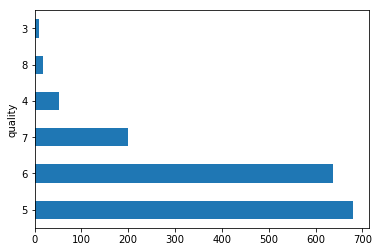

In [7]:
df['quality'].value_counts().plot(kind='barh')
plt.ylabel('quality')

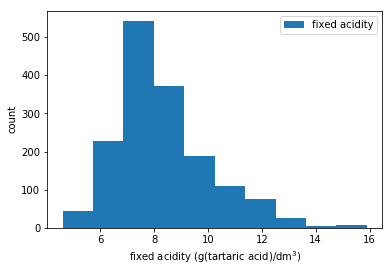

In [8]:
df.ix[:, 0:1].plot(kind='hist')
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')

## 웹 저장소에 있는 excel file 가져오기

In [9]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

In [10]:
xl = pd.read_excel(url, sheetname=None)  # all sheets

xl.keys()   # sheet names

dict_keys(['1700', '1900'])

In [11]:
xl['1700'].head()

,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


## HTTP requests : requests

In [32]:
import requests

In [34]:
url = 'http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259'

r = requests.get(url)

text = r.text
text[:1000]

'<!DOCTYPE HTML> \r\n<html lang="ko"> \r\n<head>\r\n<meta charset="euc-kr">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta http-equiv="refresh" content="600" />\r\n<meta name="viewport" content="width=1023" />\r\n\r\n    \r\n        \r\n            \r\n                \r\n                    \r\n                        \r\n                        \r\n                        \r\n                    \r\n                    \r\n                    \r\n                    \r\n                    \r\n                \r\n            \r\n            \r\n            \r\n            \r\n        \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n\r\n<meta property="og:title"       content="경제 금융 : 네이버뉴스">\r\n<meta property="og:type"        content="website">\r\n<meta property="og:url"         content="http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259">\r\n<meta proper

## BeautifulSoup : HTML parsing

In [35]:
import requests
from bs4 import BeautifulSoup

In [37]:
url = 'http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259'

r = requests.get(url)
html_doc = r.text

In [38]:
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html_doc, "lxml")
pretty_soup = soup.prettify()
pretty_soup[:1000]

'<!DOCTYPE HTML>\n<html lang="ko">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="600" http-equiv="refresh"/>\n  <meta content="width=1023" name="viewport"/>\n  <meta content="경제 금융 : 네이버뉴스" property="og:title"/>\n  <meta content="website" property="og:type"/>\n  <meta content="http://news.naver.com/main/list.nhn?mode=LS2D&amp;mid=shm&amp;sid1=101&amp;sid2=259" property="og:url"/>\n  <meta content="http://static.news.naver.net/image/news/ogtag/navernews_200x200_20160804.png" property="og:image"/>\n  <meta content="각 언론사별 금융 기사 제공" property="og:description"/>\n  <meta content="summary" name="twitter:card"/>\n  <meta content="경제 금융 : 네이버뉴스" name="twitter:title"/>\n  <meta content="네이버 뉴스" name="twitter:site"/>\n  <meta content="네이버 뉴스" name="twitter:creator"/>\n  <meta content="http://static.news.naver.net/image/news/ogtag/navernews_200x200_20160804.png" name="twitter:image"/>\n  <meta content="각 언론사별 금융 기사 제공" name="twitte

In [39]:
page_title = soup.title
page_title

<title>경제 : 네이버 뉴스	</title>

In [40]:
# Find all 'a' tags
a_tags = soup.find_all('a')

for link in a_tags:
    print(link.get('href'))
    print(link.get('title'))

#lnb
None
#snb
None
#main_content
None
http://www.naver.com/
None
http://news.naver.com/
None
/main/election/president2017/index.nhn
None
http://entertain.naver.com/home
None
http://sports.news.naver.com
None
http://newsstand.naver.com
None
http://weather.naver.com
None
/main/home.nhn
None
/main/list.nhn?mode=LSD&mid=sec&sid1=001
None
/main/main.nhn?mode=LSD&mid=shm&sid1=100
None
/main/main.nhn?mode=LSD&mid=shm&sid1=101
None
/main/main.nhn?mode=LSD&mid=shm&sid1=102
None
/main/main.nhn?mode=LSD&mid=shm&sid1=103
None
/main/main.nhn?mode=LSD&mid=shm&sid1=104
None
/main/main.nhn?mode=LSD&mid=shm&sid1=105
None
/main/opinion/home.nhn
None
/main/photo/index.nhn?mid=pho
None
/main/tv/index.nhn?mid=tvh
None
/main/ranking/popularDay.nhn?mid=etc&sid1=111
None
http://weather.naver.com/rgn/cityWetrCity.nhn?cityRgnCd=CT001013
None
http://weather.naver.com/rgn/cityWetrCity.nhn?cityRgnCd=CT001028
None
http://weather.naver.com/rgn/cityWetrCity.nhn?cityRgnCd=CT001015
None
http://weather.naver.com/rgn/ci

# API & JSON

### Open Movie Database (OMDB) API 통해 영화 정보 가져오기

In [41]:
import requests

In [42]:
url = 'http://www.omdbapi.com/?t=avengers'
r = requests.get(url)
r.text

'{"Title":"The Avengers","Year":"2012","Rated":"PG-13","Released":"04 May 2012","Runtime":"143 min","Genre":"Action, Sci-Fi","Director":"Joss Whedon","Writer":"Joss Whedon (screenplay), Zak Penn (story), Joss Whedon (story)","Actors":"Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth","Plot":"Earth\'s mightiest heroes must come together and learn to fight as a team if they are to stop the mischievous Loki and his alien army from enslaving humanity.","Language":"English, Russian","Country":"USA","Awards":"Nominated for 1 Oscar. Another 35 wins & 77 nominations.","Poster":"https://images-na.ssl-images-amazon.com/images/M/MV5BMTk2NTI1MTU4N15BMl5BanBnXkFtZTcwODg0OTY0Nw@@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.1/10"},{"Source":"Rotten Tomatoes","Value":"92%"},{"Source":"Metacritic","Value":"69/100"}],"Metascore":"69","imdbRating":"8.1","imdbVotes":"1,037,900","imdbID":"tt0848228","Type":"movie","DVD":"25 Sep 2012","BoxOffice":"$623,279,547.00","

In [43]:
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Avengers
Year:  2012
Rated:  PG-13
Released:  04 May 2012
Runtime:  143 min
Genre:  Action, Sci-Fi
Director:  Joss Whedon
Writer:  Joss Whedon (screenplay), Zak Penn (story), Joss Whedon (story)
Actors:  Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth
Plot:  Earth's mightiest heroes must come together and learn to fight as a team if they are to stop the mischievous Loki and his alien army from enslaving humanity.
Language:  English, Russian
Country:  USA
Awards:  Nominated for 1 Oscar. Another 35 wins & 77 nominations.
Poster:  https://images-na.ssl-images-amazon.com/images/M/MV5BMTk2NTI1MTU4N15BMl5BanBnXkFtZTcwODg0OTY0Nw@@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '8.1/10'}, {'Source': 'Rotten Tomatoes', 'Value': '92%'}, {'Source': 'Metacritic', 'Value': '69/100'}]
Metascore:  69
imdbRating:  8.1
imdbVotes:  1,037,900
imdbID:  tt0848228
Type:  movie
DVD:  25 Sep 2012
BoxOffice:  $623,279,547.00
Production:  Walt Disney Pictures
W

# Tweeter API

* https://dev.twitter.com 접속 후 회원가입
* 오른쪽 위 "My Apps" 선택
* Create New App
* 각 항목 입력 후 등록
* Keys and Access Tokens 탭으로 이동

(콘솔에서) pip3 install tweepy

In [47]:
import tweepy

ModuleNotFoundError: No module named 'tweepy'